## Assignment 3

**This code is for:** Creating a GaussSolve function which solves linear system of equations Ax=b for a square matrix A using forward elimination, backward substitution, and partial pivoting. Then I will compare whether forward elimination or backward substitution takes longest run. Finally, for the first part of the Part 1 I will compare how fast my GaussSolve function is compared to numpy.linalg.solve. For Part 2, solutions for truss problem and traffic flow problem were done.

In [1]:
#importing libraries
import numpy as np
import timeit
import matplotlib.pyplot as plt

## Part 1

We define GaussSolve function to solve a linear system of equations.
*How does it solve the linear system of equations?* = GaussSolve function first breaks down the system of equations into smaller pieces and then solves each component of the system. (using forward elimination, backward substitution, and partial pivoting.)

> In the GaussSolve function we have two inputs (A and B). A matrix contains the coefficients of the equations, and the b vector contains the constants on the right-hand side of the equations.

To put it differently, lets say we this example: 

x+y-z=-2

2x-y+z=5

-x+2y+2z=1

Then A matrix is: 

[1, 1 -1]

[2, -1, 1]

[-1, 2, 2]

And B vector is:
[-2, 5, 1]

We can represent this system using an augmented matrix:
| 1, 1, -1 | -2|
| 2, -1, 1 | 5 |
| -1, 2, 2 | 1 |

---------------

**raise** function used to raise an exception or error and control the flow of program.

*example:*

x = -1
if x < 0:
  raise Exception("Sorry, no numbers below zero")
  
**Then it will give:**

Exception                                 Traceback (most recent call last)
<ipython-input-3-2edc57024fbc> in <module>
      2 
      3 if x < 0:
----> 4   raise Exception("Sorry, no numbers below zero")

**Exception: Sorry, no numbers below zero**
    
-----------------------

## A

In [2]:
# defining GaussSolve function with two input (A,b)
def GaussSolve(A, b):
    # Checking whether A is a square matrix
    # A.shape[0]= number of rows in A matrix
    # A.shape[1]= number of columns in A matrix
    if A.shape[0] != A.shape[1]:
        raise ValueError("Matrix A must be square.")
        
    # Checking second condition (whether the dimensions of A and b fit)
    # checking if number of equations = right-hand side value of one equation or not
    if A.shape[0] != len(b):
        raise ValueError("Dimensions of A and b must match.")

    # !!!!! ensuring data type are same is important to make code more understandable, improve efficiency, avoid datatype conflicts, 
    # A and b have a common data type (float)
    # ndarray.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)
    A = A.astype(float)
    b = b.astype(float)

    # Storing number of equations or elements in vector b = length of vector b in the variable "n"
    n = len(b)
    
    # Creating an array of zeros with n elements, storing in the x
    # numpy.zeros(shape, dtype=float, order='C', *, like=None)
    # I will use it in backward step
    x = np.zeros(n)

    # Initialize time variables
    # check below for the question "why we need to initialize timers?"
    time_partial_pivoting = 0.0
    time_forward_elimination = 0.0
    time_backward_substitution = 0.0

    # Start-record the timer for the beginning of partial pivoting
    # timeit.default_timer() = The default timer, which is always time.perf_counter(), returns float seconds
    start_partial_pivoting = timeit.default_timer()
        
    # Partial Pivoting
    for j in range(n):
        # keeping track of index of the row with the largest absolute value in the current column.
        max_row = j # setting max_row to the current row j
        for k in range(j + 1, n):
            # as our aim ==  finding the maximum absolute value in the remaining rows within the same column ==>j+1 = current row+1
            # abs() function returns the absolute value of the given number
            if abs(A[k, j]) > abs(A[max_row, j]): #checking whether absolute value of the element in row k and column j > absolute value of the element in max_row and column j 
                max_row = k # if absolute value of the current element > max_val, updating "max_row" to the k
                #ensuring that the largest value is in the current row's position
        if max_row != j: # if max index not equal to j
            # if they are different = found a row with a larger absolute value in the same column which means a pivot operation is needed  
            # thats why: swaping the j with the row indicated by max_row [wow with the largest absolute value to the current pivot position]
            A[[j, max_row]] = A[[max_row, j]]
            # must swap vector b too as i swap matrix A (making corresponding values for coefficient matrix and the right-hand side values same)
            b[j], b[max_row] = b[max_row], b[j]

        # Checking if the leading coefficient becomes 0
        if A[j, j] == 0:
            raise ValueError("Leading coefficient became 0 after partial pivoting. Cannot proceed.")
       
        # Stop-record timer for the end of partial pivoting
        end_partial_pivoting = timeit.default_timer()
        # calculating time taken for the pivoting is calculated by subtracting the start time from the end time
        time_partial_pivoting += end_partial_pivoting - start_partial_pivoting
        # time_partial_pivoting (+=) accumulates the values each time this operation is performed.
        

        # Start-record the timer for beginning of forward elimination
        start_forward_elimination = timeit.default_timer()
        
        # Forward elimination
        # k = row index, j+1 because: eliminating values below the leading coefficient = not to include the current row j 
        for k in range(j + 1, n):
            # calculating the multiple by dividing the element at row k, column j by the element at  row  j, column j.
            # calculating multiplier value that will be used to subtract a multiple of row j from row k.
            # it is for eliminating coefficients below the leading coefficient!!
            factor = A[k, j] / A[j, j]
            b[k] -= factor * b[j] # updating k-th element of b vector by subtracting rowMultiplier and the j-th element of b
            # updating row k starting from j by subtracting rowMultiplier and elements in row j starting from column j
            A[k, j:] -= factor * A[j, j:]
            
            # Stop-record the timer for the end of forward elimination
            end_forward_elimination = timeit.default_timer()
            # calculating time taken for the forward elimination step is calculated by subtracting the start time from the end time
            time_forward_elimination += end_forward_elimination - start_forward_elimination

    # Start-record the timer for beginning of the backward substitution
    start_backward_substitution = timeit.default_timer()
    
    # Backward substitution
    # Creating an array of zeros with n elements
    for j in range(n - 1, -1, -1): # range(start_value, stop_value, step_size)
        # finding the solution to the linear system of equations
        # accepting two inputs (A and b) and return one output (x) - np.dot() takes two arrays as input and returns x as output
        x[j] = (b[j] - np.dot(A[j, j + 1:], x[j + 1:])) / A[j, j]
        # np.dot()= used to perform the dot product of two arrays (augmented_matrix[i, i+1:n] and x[i+1:])
        # (dot product = mathematical operation that calculates the product of the corresponding elements of two arrays)        
        # x[j+1:] = contains the values of the variables in the vector x starting at index j+1
        # np.dot(A[j, j + 1:], x[j + 1:])) = calculating dot product
        # Ax[j , j ] = ensuring that result is scaled-stable correctly by dividing to this
        
        # Stop-record the timer for end of the backward substitution
        end_backward_substitution = timeit.default_timer()
        # calculating time taken for the backward substitution step is calculated by subtracting the start time from the end time
        time_backward_substitution += end_backward_substitution - start_backward_substitution

    return x, time_partial_pivoting, time_forward_elimination, time_backward_substitution

notes for timer:
**which one is better? adding timer before the loop or inside the loop? what is different?**

> Basically, to measure total time spent on the entire step, adding it before the loop will give more accurate measurement. Also it will add start-stop time of the step. But if I want to measure each pivot operation separately, I need to add after/within the loop

**why we need to initialize timers?**
>  without writing this code "time_partial_pivoting = 0.0", we can also calculate the time. However, if we don't initialize it may have random values or can lead to unpredictable behavior in the code. Also, initializing values to zero provides that consistency. Basically, it is more efficient and convenient. 

#### examples

[for me to see how code works]

Example / Numbers - Source : https://www.youtube.com/watch?v=eDb6iugi6Uk&t=362s

In [3]:
# Example 1

# defining matrix A
A1 = np.array([[1, 1, -1],
              [2, -1, 1],
              [-1, 2, 2]])
# defining vector B
b1 = np.array([-2, 5, 1])

try:
    x, time_partial_pivoting, time_forward_elimination, time_backward_substitution = GaussSolve(A1, b1)
    print("Solution:", x)
    print("Time spent for partial pivoting:", time_partial_pivoting, "seconds")
    print("Time spent for forward elimination:", time_forward_elimination, "seconds")
    print("Time spent for backward substitution:", time_backward_substitution, "seconds")
except ValueError as e: #catching the error
    print("Error:", e)  #print error message stored in "e" if needed

# Example 2: check whether the matrix A is square or not

A2 = np.array([[1, 1, -1], 
               [2, -1, 1]])
b2 = np.array([-2, 5, 1])

try:
    x2, time_partial_pivoting2, time_forward_elimination2, time_backward_substitution2 = GaussSolve(A2, b2)
    print("Solution:", x2)
    print("Time spent for partial pivoting:", time_partial_pivoting, "seconds")
    print("Time spent for forward elimination:", time_forward_elimination, "seconds")
    print("Time spent for backward substitution:", time_backward_substitution, "seconds")
except ValueError as e: #catching the error
    print("Error:", e)  #print error message stored in "e" if needed

# Example 3: whether the dimensions of b and A fit

A3 = np.array([[1, 1, -1], 
               [2, -1, 1], 
               [-1, 2, 2]])
b3 = np.array([-2, 5])

try:
    x3, time_partial_pivoting3, time_forward_elimination3, time_backward_substitution3 = GaussSolve(A3, b3)
    print("Solution:", x3)
    print("Time spent for partial pivoting:", time_partial_pivoting, "seconds")
    print("Time spent for forward elimination:", time_forward_elimination, "seconds")
    print("Time spent for backward substitution:", time_backward_substitution, "seconds")
except ValueError as e: #catching the error
    print("Error:", e)  #print error message stored in "e" if needed
    
# Example 4: whether during the forward elimination step any of the leading coefficients after partial pivoting become 0

A4 = np.array([[1, 2, 3], [2, 4, 6], [1, 3, 5]])
b4 = np.array([1, 2, 3])

try:
    x4, time_partial_pivoting4, time_forward_elimination4, time_backward_substitution4 = GaussSolve(A4, b4)
    print("Solution:", x4)
    print("Time spent for partial pivoting:", time_partial_pivoting, "seconds")
    print("Time spent for forward elimination:", time_forward_elimination, "seconds")
    print("Time spent for backward substitution:", time_backward_substitution, "seconds")
except ValueError as e: #catching the error
    print("Error:", e)  #print error message stored in "e" if needed
    
# The function accept two inputs (A and b) and return one output (x)

Solution: [ 1. -1.  2.]
Time spent for partial pivoting: 0.001746500999999956 seconds
Time spent for forward elimination: 6.150899999957105e-05 seconds
Time spent for backward substitution: 0.0015929299999997149 seconds
Error: Matrix A must be square.
Error: Dimensions of A and b must match.
Error: Leading coefficient became 0 after partial pivoting. Cannot proceed.


## B
**Comparing forward elimination or backward substitution to see which one takes longest to run**

*timeit used in the def GaussSolve code above*

In [4]:
# creating random 100x100 matrix and 100 element vector
# 100 to demonstrate the functions' speed with a larger system of linear equations 
A = np.random.rand(100, 100) 
b = np.random.rand(100)

try:
    #unpacking return values from GaussSolve code
    x, time_partial_pivoting, time_forward_elimination, time_backward_substitution = GaussSolve(A, b)
    print("Time taken for forward elimination step:", time_forward_elimination, "seconds")
    print("Time taken for backward substitution step:", time_backward_substitution, "seconds")

    # Determining which method took the longest run and printing the results
    if time_backward_substitution > time_forward_elimination:
        print("backward_substitution took the longest run.")
    else:
        print("forward_elimination took the longest run.")
except ValueError as e:
    print("Error:", e)


Time taken for forward elimination step: 0.8895150140000432 seconds
Time taken for backward substitution step: 0.03637595399999549 seconds
forward_elimination took the longest run.


                    ** Why forward elimination takes more longer than backward substitution? **

Our goal in the forward elimination stage of Gaussian elimination is to reduce the matrix to its upper triangular form. In this procedure, multiples of a row are subtracted from other rows, and each element of a row is divided by the row's leading coefficient, as I applied in the code. The forward elimination step has an O(n^3) time complexity and requires many memory accesses and arithmetic operations. In contrast, the backward substitution step requires only a few operations to solve for the unknown variables and has an O(n^2) time complexity. Thats why, forward elimination takes more longer than backward substitution

## C
**Comparing GaussSolve function and numpy.linalg.solve**

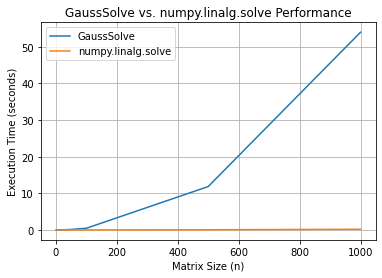

Matrix Size (n) = 1
GaussSolve (seconds) = 0.0002926709999999666
numpy.linalg.solve (seconds) = 0.005400931999999692
Speed up = 0.054188980716658404

Matrix Size (n) = 10
GaussSolve (seconds) = 0.016963030000000323
numpy.linalg.solve (seconds) = 0.007346683999999826
Speed up = 2.3089369299129685

Matrix Size (n) = 20
GaussSolve (seconds) = 0.021704694000000302
numpy.linalg.solve (seconds) = 0.001726247000000125
Speed up = 12.573342053598777

Matrix Size (n) = 50
GaussSolve (seconds) = 0.12145482199999957
numpy.linalg.solve (seconds) = 0.004479139000000298
Speed up = 27.11566263069565

Matrix Size (n) = 100
GaussSolve (seconds) = 0.45412827200000017
numpy.linalg.solve (seconds) = 0.0034589620000002874
Speed up = 131.2903327645584

Matrix Size (n) = 500
GaussSolve (seconds) = 11.83861175
numpy.linalg.solve (seconds) = 0.04516773600000157
Speed up = 262.10327987215453

Matrix Size (n) = 1000
GaussSolve (seconds) = 53.978483444
numpy.linalg.solve (seconds) = 0.18492197299998736
Speed up = 

In [5]:
# Sizes to test n=1,10,20,50,100,500,1000
# nxn different matrices
sizes = [1, 10, 20, 50, 100, 500, 1000]

# Running each matrix size 20 times for each problem
num_iterations = 20

# Creating lists to store execution times
#GaussSolve that I defined
gauss_solve_times = []
#NumPy's numpy.linalg.solve
numpy_solve_times = []
#I want to store speed up for analysis
speedup_times = []

# iterating over the elements in the sizes list
for n in sizes:
    # random nxn matrix and n vector
    A = np.random.randn(n, n)
    b = np.random.randn(n)

    # Measuring time of GaussSolve function
    # using lambda function to calls GaussSolve(A, b) for timeit function
    gauss_time = timeit.timeit(lambda: GaussSolve(A, b), number=num_iterations)
    # number=num_iterations = number of times (which is 20 times) to obtain an average execution time. 

    # Measuring time of numpy.linalg.solve
    numpy_time = timeit.timeit(lambda: np.linalg.solve(A, b), number=num_iterations)

    # Calculating speedup (how fast my function compared to numpy_solve_times)
    speedup = gauss_time / numpy_time

    # appending the result in gauss_solve_times list
    gauss_solve_times.append(gauss_time)
    # appending the result in numpy_solve_times list
    numpy_solve_times.append(numpy_time)
    # appending the speed in speed list
    speedup_times.append(speedup)

# Ploting the results
plt.plot(sizes, gauss_solve_times, label='GaussSolve')
plt.plot(sizes, numpy_solve_times, label='numpy.linalg.solve')
plt.xlabel('Matrix Size (n)') # label for X axis
plt.ylabel('Execution Time (seconds)') # label for Y axis
plt.legend()
plt.title('GaussSolve vs. numpy.linalg.solve Performance') 
plt.grid(True)
plt.show() # showing the plot

# Printing the execution time of GaussSolve and numpy.linalg.solve for each matrix size
# zip(iterator1, iterator2, iterator3 ...)
for size, gauss_time, numpy_time, speedup in zip(sizes, gauss_solve_times, numpy_solve_times, speedup_times):
    print('Matrix Size (n) = {}'.format(size))
    print('GaussSolve (seconds) = {}'.format(gauss_time))
    print('numpy.linalg.solve (seconds) = {}'.format(numpy_time))
    print('Speed up = {}'.format(speedup))
    print()
    
#zip = Iterables (which may be zero or more) are passed to the zip() method, which aggregates them into a tuple and returns it.

                       **  why GaussSolve function is slower than numpy.linalg.solve?  **
                        
As we can above, "numpy.linalg.solve" is consistently faster than "GaussSolve", especially for larger matrices.  There are several reasons why "numpy.linalg.solve" is faster than "GaussSolve".

Firstly, "numpy.linalg.solve" is a built-in function in C, while I created and defined the "GaussSolve" function in Python. Since C is a compiled language, it is faster than Python, which is an interpreted language.

Second, "numpy.linalg.solve" performs better since it solves linear equations using a variety of methods and algorithms. However, "GaussSolve" is a simple implementation of Gaussian elimination.

Overall, when it comes to solving linear equations, "numpy.linalg.solve" is a better option than "GaussSolve". It offers significantly faster, easy to use, and greater accuracy.

## Part2

## A
Use your code to solve the simple truss problem from class to determine the six unknown forces F1,F2,F3,H2,V2,V3. See the class material for the layout of the problem and for the matrix. You can use “kg” as the force unit

    [A]{x}={b} EQUATION

    [ -0.866 0  0.5  0 0 0 ] [F1] = [0]
    [ -0.5  0  -0.866 0 0 0 ] [F2] = [-1000]
    [ 0.866 1 0 1 0 0 ] [F3] = [0]
    [ 0.5 0 0 0 1 0] [H2] = [0]
    [0 -1 -0.5 0 0 0] [V2] = [0]
    [ 0 0 0.866 0 0 1] [V3] = [0]
    
    
    -0.866F1 + 0F2 + 0.5F3 + 0H2 + 0V2 + 0V3 = 0
    -0.5F1 + 0F2 + 0.866F3 + 0H2 + 0V2 + 0V3 = -1000
    0.866F1 + 1F2 + 0F3 + 1H2 + 0V2 + 0V3 = 0
    0.5F1 + 0F2 + 0F3 + 0H2 + 1V2 + 0V3 = 0
    0F1 - 1F2 - 0.5 F3 + 0H2 + 0V2 + 0V3 = 0 
    0F1 + 0F2 + 0.866F3 + 0H2 + 0V2 + 1V3 = 0 
    
    THEN IT IS:
    
    -0.866F1 + 0.5F3 = 0
    -0.5F1 - 0.866F3 = -1000
    0.866F1 + 1F2 + 1H2 = 0
    0.5F1 + 1V2 = 0
    -1F2 - 0.5 F3 = 0 
    0.866F3 + 1V3 = 0 

In [8]:
# Coefficient matrix A
# row enchelon form 
A6 = np.array([[-0.866, 0, 0.5, 0, 0, 0],
              [-0.5, 0, -0.866, 0, 0, 0],
              [0.866, 1, 0, 1, 0, 0],
              [0.5, 0, 0, 0, 1, 0],
              [0, -1, -0.5, 0, 0, 0],
              [0, 0, 0.866, 0, 0, 1]])

# Right-hand side vector b
b6 = np.array([0, -1000, 0, 0, 0, 0])

# Solve the system of equations using GaussSolve
try:
    x6 = GaussSolve(A6, b6)
    print("Solution:", x6)
except ValueError as e:
    print("Error:", e)

Solution: (array([ 500.02200097, -433.01905284,  866.03810568,    0.        ,
       -250.01100048, -749.98899952]), 0.0009124769999715454, 0.000362585999937437, 0.00122259700003724)


## B
Use your code to solve a traffic flow problem. In the picture below, you see a cutout of a city with different streets and junctions. Since you have traffic cameras positioned at the exits of the block, you can measure how many cars enter and exit the block. These numbers are given next to the arrows and all streets are ONE-WAY streets. Your task is to find out the missing numbers x1, x2, x3, x4 using a system of linear equations.

    NODE   FLOW IN   FLOW OUT  EQUATION
    A      200+100   X1+X4     X1+X4=300
    B      X1+X2     100+150   X1+X2=250
    C      50+50     X2+X3     X2+X3=100
    D      X3+X4     100+50    X3+X4=150
    
    to have balanced networtk flow in = flow out 
    
    X1+X4=300
    X1+X2=250
    X2+X3=100
    X3+X4=150
    
    [ 1  0  0  1 | 300 ]
    [ 1  1  0  0 | 250 ]
    [ 0  1  1  0 | 100 ]
    [ 0  0  1  1 | 150 ]

In [7]:
# Define the augmented matrix A and the constants vector b
A5 = np.array([[1, 0, 0, 1],
     [1, 1, 0, 1],
     [0, 1, 1, 0],
     [0, 0, 1, 1]])

b5 = np.array([300, 250, 100, 150])

# Use the gaussSolve function to find the solutions
solutions = GaussSolve(A,b)

# Solve the system of equations using GaussSolve
try:
    x5 = GaussSolve(A5, b5)
    print("Solution:", x5)
except ValueError as e:
    print("Error:", e)


Solution: (array([300., -50., 150.,   0.]), 0.00011725500002057743, 6.341400003861963e-05, 3.634099998350848e-05)
